In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers, Model

def preprocess_data(example):
    image = example['image']
    label = tf.one_hot(example['label'], depth=2)  # Assuming there are 2 classes (0 and 1)

    # Resize, normalize, and convert to grayscale
    image = tf.image.resize(image, [32, 32])
    image = tf.image.rgb_to_grayscale(image)
    image = image / 255.0
    
    return image, label

# file path and data split
ds1, ds2, ds3 = tfds.load('patch_camelyon',
                         split=['train[:20%]', 'test[:5%]', 'validation[:5%]'],
                         data_dir=r'C:\Job_og_eksamensbevis\Github\projekter\Projekt_1_Computer_Vision',
                         download=False,
                         shuffle_files=True)

# Preprocess the datasets using preprocess_data function
train_dataset = ds1.map(preprocess_data).batch(32)
validation_dataset = ds3.map(preprocess_data).batch(32)
test_dataset = ds2.map(preprocess_data).batch(32)

def build_cnn(input_shape):
    # Create a new input layer for the preprocessed images
    cnn_input = layers.Input(shape=input_shape)

    # Build CNN layers for classification
    x = layers.Conv2D(32, (3, 3), activation='relu')(cnn_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)  # Flatten the output. x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    cnn_output = layers.Dense(2, activation="softmax")(x)  # Output layer for 2 classes

    # Create the CNN model
    cnn_model = Model(inputs=cnn_input, outputs=cnn_output)

    return cnn_model

# Assuming you have already defined input_shape as (32, 32, 1) based on your preprocessing
input_shape = (32, 32, 1)
cnn_model = build_cnn(input_shape)


In [10]:


# Define loss function and optimizer
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
cnn_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the model
history = cnn_model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Access the training history
loss = history.history['loss']
val_loss = history.history['val_loss']



Epoch 1/10
1639/1639 [==============================] - 40s 22ms/step - loss: 0.5146 - accuracy: 0.7511 - val_loss: 0.4607 - val_accuracy: 0.7924
Epoch 2/10
1639/1639 [==============================] - 37s 22ms/step - loss: 0.4769 - accuracy: 0.7797 - val_loss: 0.4403 - val_accuracy: 0.8077
Epoch 3/10
1639/1639 [==============================] - 37s 22ms/step - loss: 0.4625 - accuracy: 0.7882 - val_loss: 0.4388 - val_accuracy: 0.7998
Epoch 4/10
1639/1639 [==============================] - 37s 23ms/step - loss: 0.4519 - accuracy: 0.7927 - val_loss: 0.4326 - val_accuracy: 0.8053
Epoch 5/10
 672/1639 [===========>..................] - ETA: 21s - loss: 0.4421 - accuracy: 0.7975

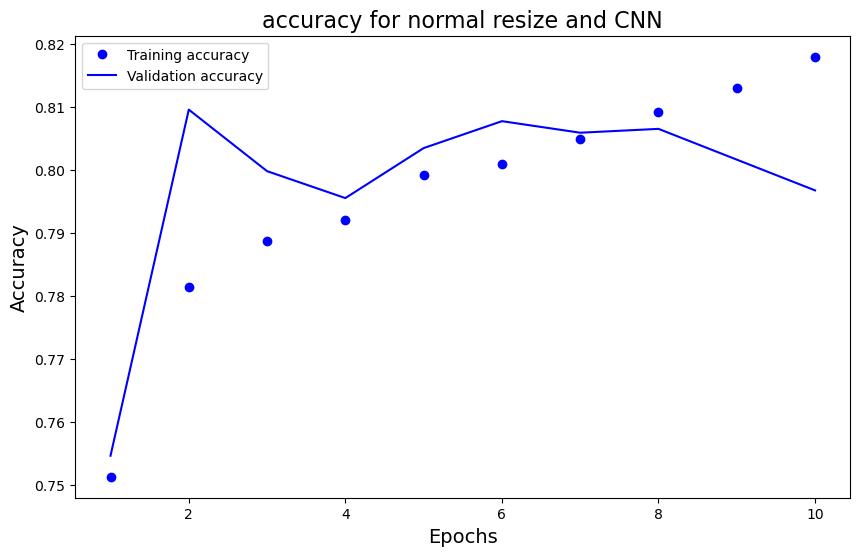

In [5]:
#plotter CNN accuracy

import matplotlib.pyplot as plt

# Access the history of training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Access the epochs range
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

# Add a title with a specified fontsize
plt.title('accuracy for normal resize and CNN', fontsize=16)

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()

plt.show()

